<a href="https://colab.research.google.com/github/21077964/FINAL-PROJECT-REPORT/blob/main/Detecting_Anomalies_in_Twitter_Behaviour.21077964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Anomalies in Twitter Behaviour

### Aims and Objectives:
#### Aims:
    1. Analyze patterns of user behavior on Twitter to identify anomalies.
    2. Develop advanced data-driven algorithms for detecting anomalies in Twitter user interactions and content dissemination.
    3. Validate algorithm effectiveness through rigorous testing against known anomalies and real-world data.
#### Objectives:
    1. Collect and preprocess Twitter data, focusing on user interactions and engagement metrics.
    2. Conduct exploratory data analysis (EDA) to understand normal and anomalous behavior patterns.
    3. Implement machine learning algorithms suitable for anomaly detection in Twitter data.
    4. Evaluate algorithm performance using precision, recall, and F1-score metrics.
    5. Apply validated algorithms to real-world scenarios to assess scalability and practical utility.
    6. Address ethical considerations related to data privacy and responsible data usage.
### Research Question
    • How can data-driven algorithms be developed to effectively detect anomalies in Twitter user behaviour?

In [90]:
import os

#  Environment Setup

In [91]:
import warnings

# Ignore specific types of warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)



# Data manipulation and analysis
import pandas as pd
import numpy as np
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and natural language processing
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier,GradientBoostingClassifier
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM


# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

# Utility
import warnings
warnings.filterwarnings('ignore')
# Ignore SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)



# Data Loading from Kaggle

In [92]:
 #Data Loading from Kaggle
# Download the dataset (replace with the specific dataset you want to use)
os.system('kaggle datasets download -d kazanova/sentiment140')

0

In [93]:
# Unzip the dataset
os.system('unzip sentiment140.zip')

256

In [94]:
# Load the dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',
                   encoding='ISO-8859-1', header=None)



# Data Preprocessing

In [95]:
# Adding column names to the dataset
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [96]:
data.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [97]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [98]:
data['Day of Week'] = data['date'].dt.day_name()
data['Hour'] = data['date'].dt.hour

data.drop(columns=['date'],inplace=True)

In [99]:
data['target'].unique()

array([0, 4])

In [100]:
data1 = data.iloc[:10000]

In [101]:
data2 = data.tail(10000)

In [102]:
data = pd.concat([data1, data2], axis=0)

In [103]:
data['target'].unique()

array([0, 4])

In [104]:
import re
import string
from nltk.corpus import stopwords
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\n', '', text)  # remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # remove words containing numbers
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # remove stopwords
    return text

In [105]:
# Download the stopwords dataset
import nltk
nltk.download('stopwords')
data['Cleaned Tweets'] = data['text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
data.head()

,target,ids,flag,user,text,Day of Week,Hour,Cleaned Tweets
0,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Monday,22,switchfoot awww thats bummer shoulda got david...
1,0,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Monday,22,upset cant update facebook texting might cry r...
2,0,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Monday,22,kenichan dived many times ball managed save re...
3,0,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Monday,22,whole body feels itchy like fire
4,0,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Monday,22,nationwideclass behaving im mad cant see


In [107]:
# 3. Data Inspection
print("Data Shape:", data.shape)


Data Shape: (20000, 8)


In [108]:
print("Data Info:\n", data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 1599999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          20000 non-null  int64 
 1   ids             20000 non-null  int64 
 2   flag            20000 non-null  object
 3   user            20000 non-null  object
 4   text            20000 non-null  object
 5   Day of Week     20000 non-null  object
 6   Hour            20000 non-null  int32 
 7   Cleaned Tweets  20000 non-null  object
dtypes: int32(1), int64(2), object(5)
memory usage: 1.3+ MB
Data Info:
 None


In [109]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 target            0
ids               0
flag              0
user              0
text              0
Day of Week       0
Hour              0
Cleaned Tweets    0
dtype: int64


In [110]:
# 4. Data Preparation
# Dropping unnecessary columns
data = data.drop(['ids','text', 'flag', 'user'], axis=1)

In [112]:
data.head()

,target,Day of Week,Hour,Cleaned Tweets
0,0,Monday,22,switchfoot awww thats bummer shoulda got david...
1,0,Monday,22,upset cant update facebook texting might cry r...
2,0,Monday,22,kenichan dived many times ball managed save re...
3,0,Monday,22,whole body feels itchy like fire
4,0,Monday,22,nationwideclass behaving im mad cant see


In [113]:
# 5. Exploratory Data Analysis (EDA)
# Basic statistics
print("Data Description:\n", data.describe())

Data Description:
             target          Hour
count  20000.00000  20000.000000
mean       2.00000      7.596000
std        2.00005      5.961985
min        0.00000      0.000000
25%        0.00000      5.000000
50%        2.00000      6.000000
75%        4.00000      8.000000
max        4.00000     23.000000


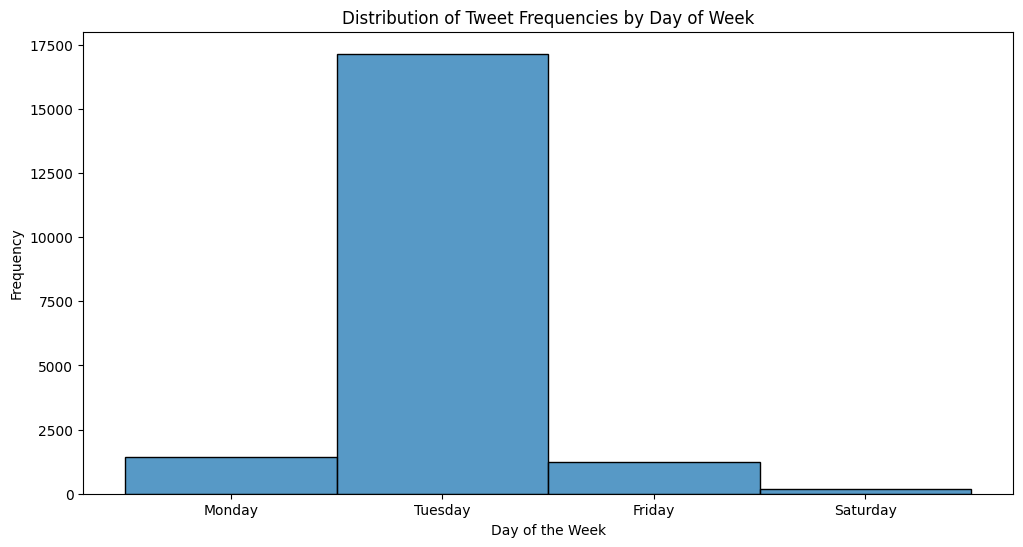

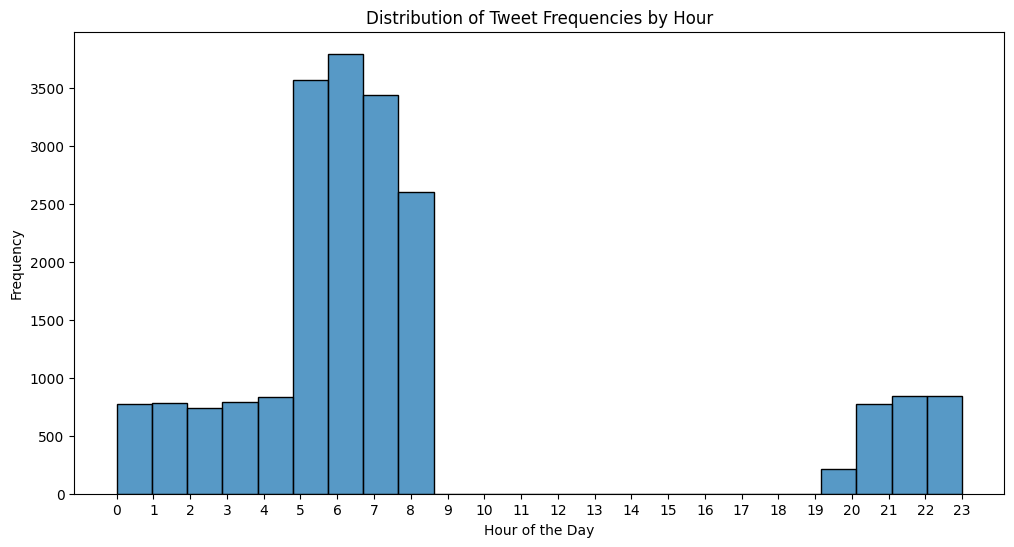

In [115]:

# Time series plots of tweet activity by hour and day of the week
plt.figure(figsize=(12, 6))

# Histogram of tweet frequencies by Day

sns.histplot(data['Day of Week'], kde=False)
plt.title('Distribution of Tweet Frequencies by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')


plt.show()

# Histogram of tweet frequencies by hour
plt.figure(figsize=(12, 6))
sns.histplot(data['Hour'], bins=24, kde=False)
plt.title('Distribution of Tweet Frequencies by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(24))

plt.show()

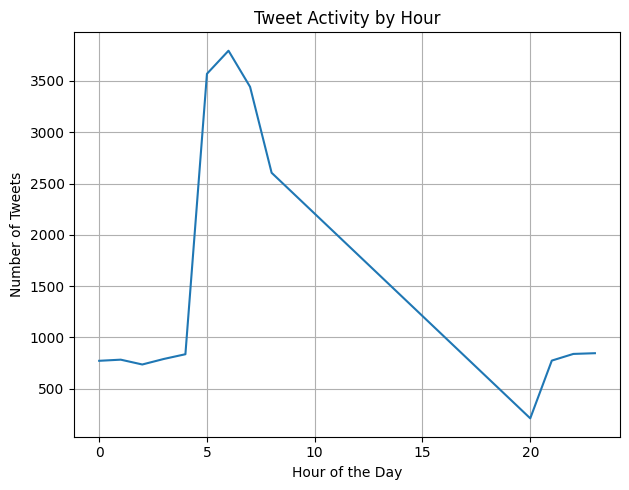

In [116]:
# Time series plots of tweet activity by hour and day of the week
plt.figure(figsize=(12, 5))

# Tweet activity by hour
plt.subplot(1, 2, 1)
hourly_activity = data['Hour'].value_counts().sort_index()
hourly_activity.plot(kind='line')
plt.title('Tweet Activity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.grid(True)


plt.tight_layout()
plt.show()

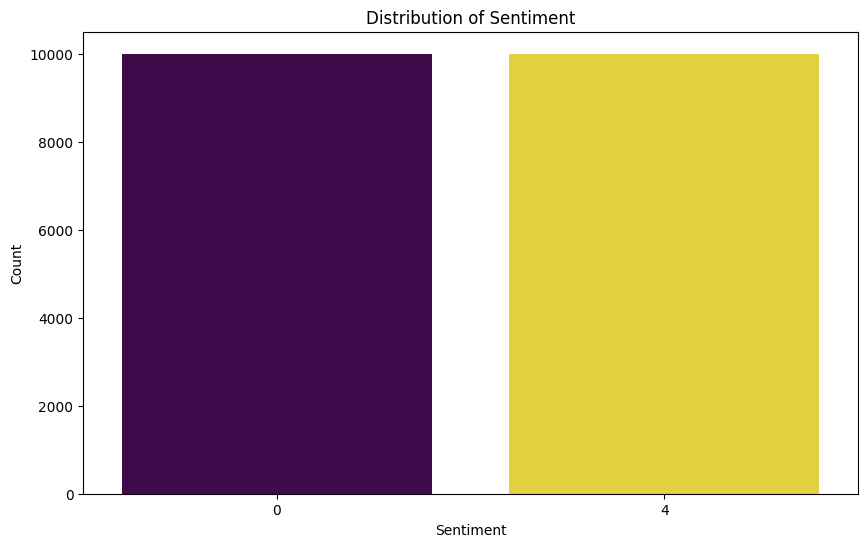

In [117]:
# Bar plot of sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='target', data=data, palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

In [78]:
data['target'].unique()

array([0, 4])

In [80]:
data['Day of Week'] = data['Day of Week'].map(
    {
        'Monday':10,
        'Tuesday':20,
        'Wednesday':30,
        'Thursday':40,
        'Friday':50,
        'Saturday':60,
        'Sunday':70,

    }
)

In [81]:
# 7. Feature Selection
# TF-IDF Vectorization for text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['Cleaned Tweets'])

In [82]:
y = data['target']

In [83]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [84]:
# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model Evaluation:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Model Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60      2019
           4       0.63      0.88      0.73      1981

    accuracy                           0.68      4000
   macro avg       0.72      0.68      0.67      4000
weighted avg       0.72      0.68      0.67      4000

[[ 976 1043]
 [ 237 1744]]
Accuracy: 0.68


In [118]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)
# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2019
           4       0.72      0.80      0.76      1981

    accuracy                           0.74      4000
   macro avg       0.75      0.75      0.74      4000
weighted avg       0.75      0.74      0.74      4000

[[1391  628]
 [ 393 1588]]
Accuracy: 0.74475
